In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [14]:
df=pd.read_csv('creditcard.csv')

In [17]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,20414.000000,20414.000000,20414.000000,20414.000000,20414.000000,20414.000000,20414.000000,20414.000000,20414.000000,20414.000000,...,20414.000000,20414.000000,20414.000000,20413.000000,20413.000000,20413.000000,20413.000000,20413.000000,20413.000000,20413.000000
mean,15880.030126,-0.244137,0.235304,0.746259,0.273772,-0.164187,0.092052,-0.141890,0.020625,0.616372,...,-0.045520,-0.143357,-0.038522,0.010198,0.124062,0.031410,0.013809,0.007390,70.697696,0.004213
std,10653.852085,1.886242,1.523911,1.757284,1.461833,1.425048,1.328919,1.330981,1.344349,1.278878,...,0.832991,0.638849,0.519541,0.591599,0.437543,0.528235,0.396822,0.248255,205.318818,0.064772
min,0.000000,-30.552380,-40.978852,-31.103685,-5.172595,-32.092129,-23.496714,-26.548144,-41.484823,-7.175097,...,-20.262054,-8.593642,-26.751119,-2.728650,-7.495741,-1.338556,-8.567638,-3.612114,0.000000,0.000000
25%,4766.750000,-0.960555,-0.334134,0.307746,-0.638723,-0.746520,-0.657199,-0.597991,-0.171259,-0.225391,...,-0.258423,-0.560824,-0.175154,-0.333510,-0.137728,-0.341405,-0.068528,-0.010654,5.900000,0.000000
50%,15833.000000,-0.302521,0.214177,0.896730,0.225655,-0.201416,-0.174142,-0.071114,0.023868,0.591965,...,-0.113840,-0.115318,-0.047817,0.061608,0.161641,-0.039429,0.004515,0.019236,16.500000,0.000000
75%,26686.750000,1.164125,0.866939,1.532066,1.140159,0.339677,0.485913,0.449385,0.279391,1.386226,...,0.051946,0.258064,0.073657,0.398624,0.402988,0.326835,0.096916,0.077603,60.090000,0.000000
max,31027.000000,1.960497,16.713389,4.101716,11.927512,34.099309,21.393069,34.303177,20.007208,10.392889,...,22.614889,5.805795,13.876221,3.695503,5.525093,3.517346,8.254376,4.860769,7879.420000,1.000000


In [15]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [19]:
df.shape

(20414, 31)

In [20]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [21]:
df.duplicated().sum()

69

In [22]:
df.drop_duplicates(inplace=True)

<Axes: xlabel='Class', ylabel='Time'>

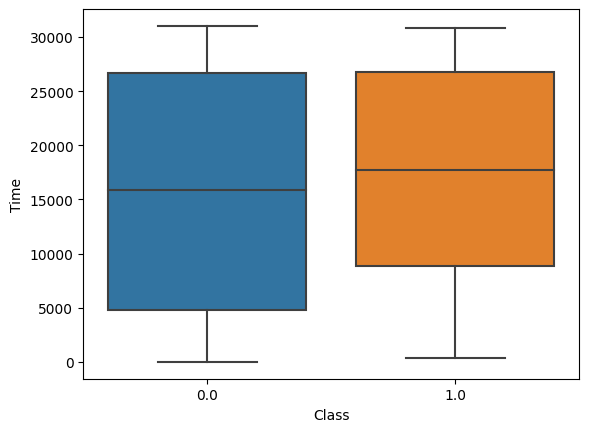

In [23]:
sns.boxplot(x='Class',y='Time',data=df)

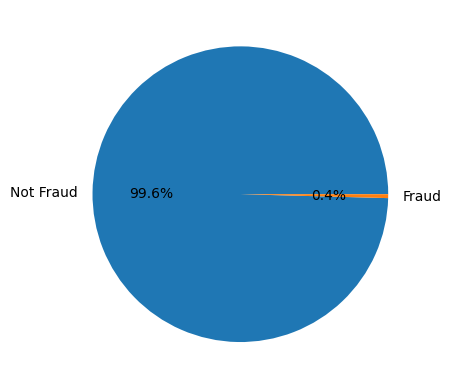

In [24]:
plt.pie(x=df['Class'].value_counts(),labels=['Not Fraud','Fraud'],autopct="%0.1f%%")
plt.show()

In [26]:
def plot_correlations(df):
    df=df[[col for col in df if df[col].nunique()>1]]
    plt.figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
    corr=df.corr()
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title('Correlation Matrix')
    plt.show()

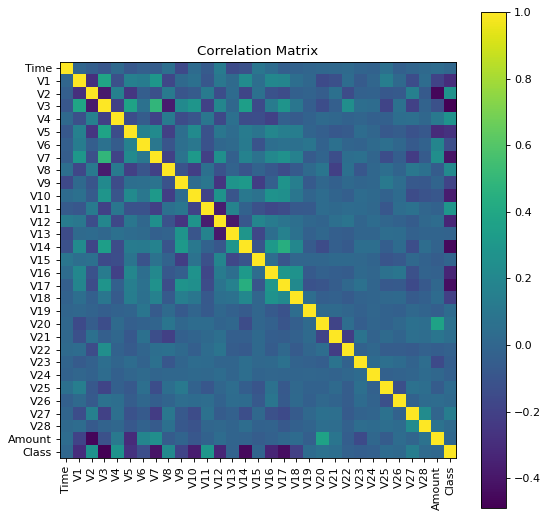

In [27]:
plot_correlations(df)

In [28]:
def plot_distributions(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if 1 < nunique[col] < 50]]
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = int((nCol + nGraphPerRow - 1) / nGraphPerRow)  # Convert to integer
    plt.figure(num=None, figsize=(6 * nGraphPerRow, 8 * nGraphRow), dpi=80, facecolor='w', edgecolor='k')

    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]

        if not np.issubdtype(type(columnDf.iloc[0]), np.number):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()

        plt.ylabel('counts')
        plt.xticks(rotation=90)
        plt.title(f'{columnNames[i]} (column {i})')

    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    plt.show()

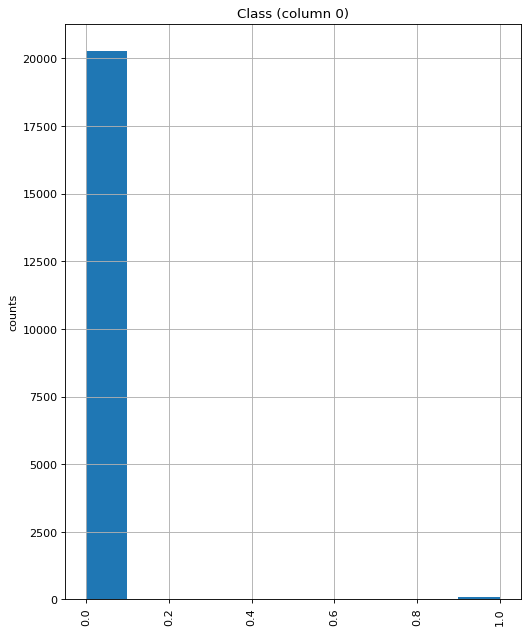

In [29]:
plot_distributions(df,10,5)

In [31]:
x=df.drop(['Class','Time'],axis=1)
y=df['Class']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.03)
x_train.shape,x_test.shape

((19734, 29), (611, 29))

In [35]:
svc = SVC(kernel='sigmoid', gamma=1.0)
lr = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
algos={
    'SVC':svc,
    'LR':lr,
    'RFC':rfc,
    'XGB':xgb,
    'BC':bc,
}
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [41]:
from sklearn.utils import resample

# Assuming df is your DataFrame
fraud_df = df[df['Class'] == 1]
non_fraud_df = df[df['Class'] == 0]

# Downsampling the majority class to match the size of the minority class
non_fraud_downsampled = resample(non_fraud_df,
                                 replace=False,
                                 n_samples=len(fraud_df),
                                 random_state=42)

new_df = pd.concat([non_fraud_downsampled, fraud_df])

new_df = new_df.sample(frac=1, random_state=42)
new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
15631,27040,1.216570,0.288014,0.520445,1.111957,-0.453190,-0.898168,0.073546,-0.135553,0.144015,...,-0.234378,-0.728761,0.104834,0.324655,0.345105,-0.629100,0.018968,0.029480,9.99,0.0
12070,20931,-16.367923,9.223692,-23.270631,11.844777,-9.462037,-2.450444,-16.925152,1.384208,-6.287736,...,-2.343674,1.004602,1.188212,-1.047184,-0.035573,0.664900,2.122796,-1.416741,1.00,1.0
15506,26899,-21.885434,12.930505,-24.098872,6.203314,-16.466099,-4.459842,-16.519836,14.535565,-3.897022,...,1.762232,-1.579055,-0.951043,0.134565,1.507110,-0.222671,1.527655,0.453699,99.99,1.0
18687,29690,-1.398314,2.058723,-0.496607,2.948585,-0.961387,0.030352,0.860966,0.429927,-1.515941,...,0.246591,0.756050,0.239014,0.427256,-1.133232,0.060633,-0.252129,0.113665,169.76,0.0
15751,27187,-24.590245,14.044567,-26.278701,6.320089,-18.224513,-4.609968,-17.681003,16.213627,-3.794093,...,1.777063,-1.804874,-1.140605,0.152234,1.715997,-0.220471,1.434951,0.422492,99.99,1.0


from matplotlib import pyplot as plt
_df_0['Time'].plot(kind='hist', bins=20, title='Time')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['V1'].plot(kind='hist', bins=20, title='V1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['V2'].plot(kind='hist', bins=20, title='V2')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['V3'].plot(kind='hist', bins=20, title='V3')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Time', y='V1', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='V1', y='V2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='V2', y='V3', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='V3', y='V4', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Time']
  ys = series['V1']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('Time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Time')
_ = plt.ylabel('V1')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Time']
  ys = series['V2']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('Time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Time')
_ = plt.ylabel('V2')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Time']
  ys = series['V3']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('Time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Time')
_ = plt.ylabel('V3')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Time']
  ys = series['V4']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('Time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Time')
_ = plt.ylabel('V4')

from matplotlib import pyplot as plt
_df_12['Time'].plot(kind='line', figsize=(8, 4), title='Time')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['V1'].plot(kind='line', figsize=(8, 4), title='V1')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['V2'].plot(kind='line', figsize=(8, 4), title='V2')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['V3'].plot(kind='line', figsize=(8, 4), title='V3')
plt.gca().spines[['top', 'right']].set_visible(False)

In [42]:
new_df.shape

(172, 31)

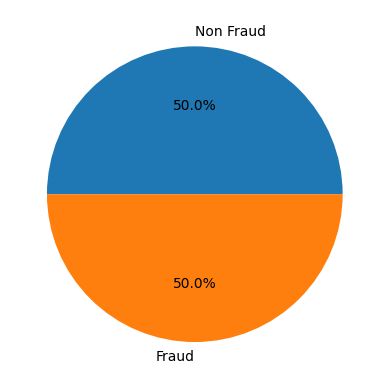

In [43]:
plt.pie(new_df['Class'].value_counts(),labels=['Non Fraud','Fraud'],autopct='%0.1f%%')
plt.show()

In [44]:
x_new=new_df.drop(['Time','Class'],axis=1)
y_new=new_df['Class']
x_train_new,x_test_new,y_train_new,y_test_new=train_test_split(x_new,y_new,random_state=42,test_size=0.1)
x_train_new.shape,x_test_new.shape

((154, 29), (18, 29))

In [45]:
pre_acc_balanced = {}
for name,algo in algos.items():
    algo.fit(x_train_new, y_train_new)
    y_pred = algo.predict(x_test_new)
    pre_acc_balanced[name] = {
        'Precision': precision_score(y_test_new, y_pred),
        'Accuracy': accuracy_score(y_test_new, y_pred),
        'Confusion Matrix': confusion_matrix(y_test_new, y_pred),
    }
pre_acc_balanced

{'SVC': {'Precision': 0.6,
  'Accuracy': 0.6111111111111112,
  'Confusion Matrix': array([[8, 2],
         [5, 3]])},
 'LR': {'Precision': 1.0,
  'Accuracy': 0.9444444444444444,
  'Confusion Matrix': array([[10,  0],
         [ 1,  7]])},
 'RFC': {'Precision': 1.0,
  'Accuracy': 0.9444444444444444,
  'Confusion Matrix': array([[10,  0],
         [ 1,  7]])},
 'XGB': {'Precision': 1.0,
  'Accuracy': 0.9444444444444444,
  'Confusion Matrix': array([[10,  0],
         [ 1,  7]])},
 'BC': {'Precision': 1.0,
  'Accuracy': 0.9444444444444444,
  'Confusion Matrix': array([[10,  0],
         [ 1,  7]])}}

In [46]:
rfc.fit(x_train_new,y_train_new)
RandomForestClassifier(n_estimators=50, random_state=2)
from sklearn.metrics import classification_report
print(classification_report(y_test_new,rfc.predict(x_test_new)))

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95        10
         1.0       1.00      0.88      0.93         8

    accuracy                           0.94        18
   macro avg       0.95      0.94      0.94        18
weighted avg       0.95      0.94      0.94        18

